# Assignment \# VIII:  Neural Networks

## Problem statement

We will implement a simple neural network for classification. Let's first see how a simple logistic regression method works on the $\text{moon}$ dataset. This dataset has been widely used to evaluate performance of a nonlinear classifier or clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [ ]:
from NN import *

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [5]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

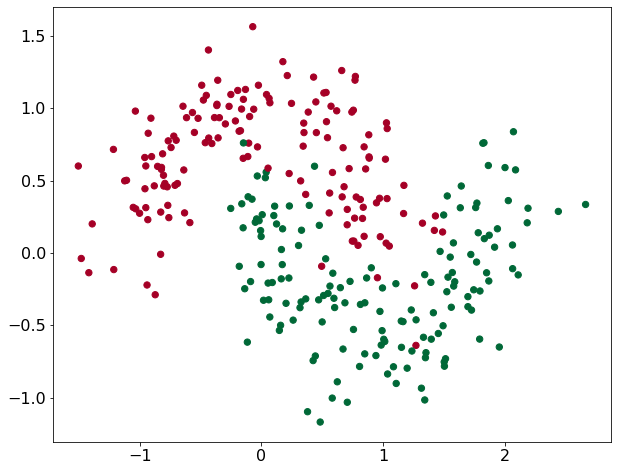

In [6]:
plt.scatter(X_train[:,0], X_train[:,1], s = 40, c=y_train, cmap=plt.cm.RdYlGn)

It seems hard to classify samples in the dataset using linear classifiers such as a logistic regression method. That is, drawing a straight line (i.e., decision boundaries) to divide training samples into two different regions is not feasible. The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the following webpage: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [7]:
import sklearn.linear_model

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use the help function ($\texttt{plot_decision_boundary}$) that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers, e.g., the output value of the sigmoid function in case of logistic regression. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are the training dataset and color for each label in the dataset, respectively. See the example below.

In [8]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X_train, y_train)

LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

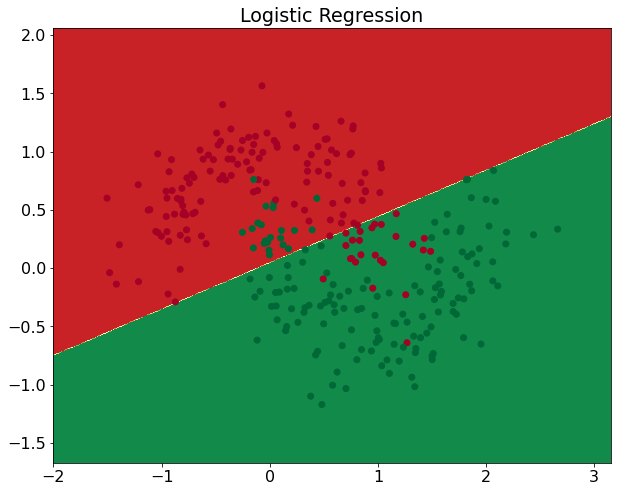

In [9]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X_train, color = y_train)
plt.title("Logistic Regression")

In [10]:
X_train.shape

(300, 2)

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a nonlinear classifier with a simple neural network, and apply it to classify samples in the $\texttt{moon}$ dataset. The neural network we will implement consists of series of fully connected layers followed by nonlinear activation functions. 

### P1. Implement Neural networks using gradiend descent.
P1.1 Implement a multilayer perceptron method (```class NeuralNetwork```) using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset. Plot training losses and training accuracy over the number of epochs. (*50 points*)

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = \sigma(H_1)$ where $\sigma$ is a sigmoid function unit and $z_1$ is an output of the first hidden layer.  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = tanh(H_2)$ where $\tanh$ is a tanh function and $z_2$ is an output of the second hidden layer.    
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = softmax(H_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(h)_j= \frac{\exp^{h_j}}{\sum_{k=1}^{K} \exp^{h_k}}$ for $j=1,\dots,K$,
 >
 > where $h_j$ is the $j$th element of the input vector $h\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > **$W$** and **$b$** are weights and bias, respectively.    
 > **Initialization for weight**: Standard normal (use $\texttt{np.random.randn}$.)  
 > **Initialization for bias (intercept)**: 0     
 > **Input size**: 2  
 > **The first hidden layer size**: 10  
 > **The second hidden layer size**: 10  
 > **Output size**: 2   
 > **Regularization coefficient $\lambda$**: 0.001  
 > **Loss function**: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(H_3)_k)$
 >
 > where $I_k$ is an indicator function that has the value of 1 if the training sample belongs to the class $k$ and 0 otherwise.   
 > **Total loss** : summation of above for all training samples and L2 normalization loss   
 >
 > $L_{total} = -\sum_{i=1}^N{\sum_{k=1}^K I^{(i)}_k \log(softmax(H_3^{(i)})_k)} +  \lambda \|W\|^2 $
 >
 > where $I^{(i)}$ and $H_3^{(i)}$ are the indicator and the output of the last hidden layer of i-th sample respectively.  
 > **Optimization**: Gradient descent  
 > **Learning rate** = 0.001  
 > **Number of epochs** = 50000

### P2. A modular approach to implementing Neural networks

P2.1 Implement ```class Linear```, ```class ReLU```, ```class Tanh```, ```class Sigmoid``` and ```class NeuralNetwork_module``` (*30 points*).

We will implement a multilayer perceptron method with modular functions, similar to the generic deep learning libraries such as `PyTorch` and `TensorFlow`.  To perform classification using ```class NeuralNetwork_module```, we define `forward` and `backward` operations for each layer (e.g., ReLu layer, linear layer (y=Wx), Tanh layer, or sigmoid layer), whose inputs and ouputs are matrices. Note that a linear layer (```Linear``` class) also inputs an additinal weight matrix. Note also that we should chche data needed for a backward pass in `forward` operations.


Please see the description for `forward` and `backward` operations in the linear layer (```class Linear```) below.
```python
class Layer(Object):
    @staticmethod
    def forward(x):
      """ Receive inputs x and weights w """
      # Do some computations ...
      z = # ... some intermediate value
      # Do some more computations ...
      out = # the output

      cache = (x, out) # Values we need to compute gradients

      return out, cache

    @staticmethod
    def backward(dout, cache):
      """
      Receive dout (derivative of loss with respect to outputs) and cache,
      and compute derivative with respect to inputs.
      """
      # Unpack cache values
      x, out = cache
    
      # Use values in cache to compute derivatives
      dx = # Derivative of loss with respect to x
     
      return dx
```




### P1.1

In [11]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 36.71552831566615
Loss (epoch 2000): 31.308819857207258
Loss (epoch 3000): 29.123652284168525
Loss (epoch 4000): 27.31914508267015
Loss (epoch 5000): 25.99180128736188
Loss (epoch 6000): 25.133373395718095
Loss (epoch 7000): 24.449980204468044
Loss (epoch 8000): 23.872356118523122
Loss (epoch 9000): 23.35453861181309
Loss (epoch 10000): 22.860559590075702
Loss (epoch 11000): 22.35692630583377
Loss (epoch 12000): 21.799365141400724
Loss (epoch 13000): 21.187849719720116
Loss (epoch 14000): 20.596215307278662
Loss (epoch 15000): 20.335409857053726
Loss (epoch 16000): 19.785313657893475
Loss (epoch 17000): 19.27655868291865
Loss (epoch 18000): 18.77699336242006
Loss (epoch 19000): 18.27930103399109
Loss (epoch 20000): 17.78514643951342
Loss (epoch 21000): 17.308995731661877
Loss (epoch 22000): 16.87475453282268
Loss (epoch 23000): 16.499690237656285
Loss (epoch 24000): 16.14895360257157
Loss (epoch 25000): 15.815416630132344
Loss (epoch 26000): 15.49625124595253
Loss (e

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

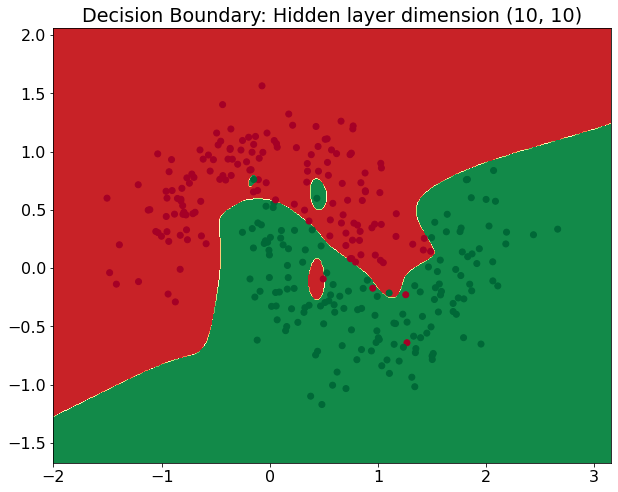

In [12]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

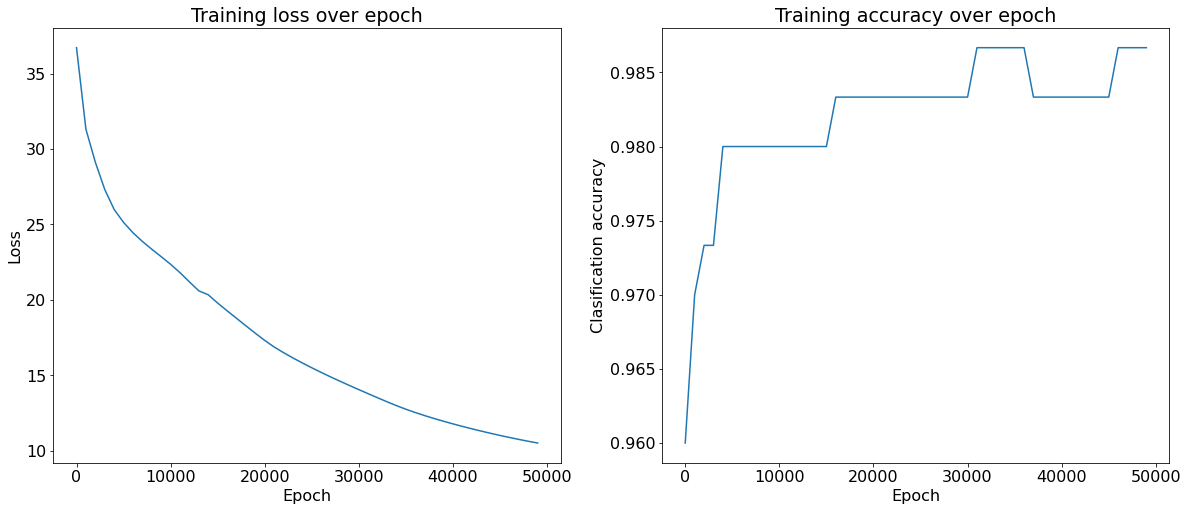

In [13]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

### P2.1

In [14]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 36.71552831558282
Loss (epoch 2000): 31.308819857179834
Loss (epoch 3000): 29.12365228417596
Loss (epoch 4000): 27.31914508268684
Loss (epoch 5000): 25.99180128736008
Loss (epoch 6000): 25.1333733957197
Loss (epoch 7000): 24.449980204472087
Loss (epoch 8000): 23.872356118528145
Loss (epoch 9000): 23.35453861181639
Loss (epoch 10000): 22.860559590071336
Loss (epoch 11000): 22.35692630581022
Loss (epoch 12000): 21.79936514134713
Loss (epoch 13000): 21.18784971965356
Loss (epoch 14000): 20.59621530721965
Loss (epoch 15000): 20.33221931399305
Loss (epoch 16000): 19.784868067686872
Loss (epoch 17000): 19.276328797723917
Loss (epoch 18000): 18.776855543639908
Loss (epoch 19000): 18.279215696600318
Loss (epoch 20000): 17.785095087918613
Loss (epoch 21000): 17.30896835296334
Loss (epoch 22000): 16.874757124465393
Loss (epoch 23000): 16.499706481109953
Loss (epoch 24000): 16.148967920773977
Loss (epoch 25000): 15.81542872154125
Loss (epoch 26000): 15.496260998848843
Loss (epo

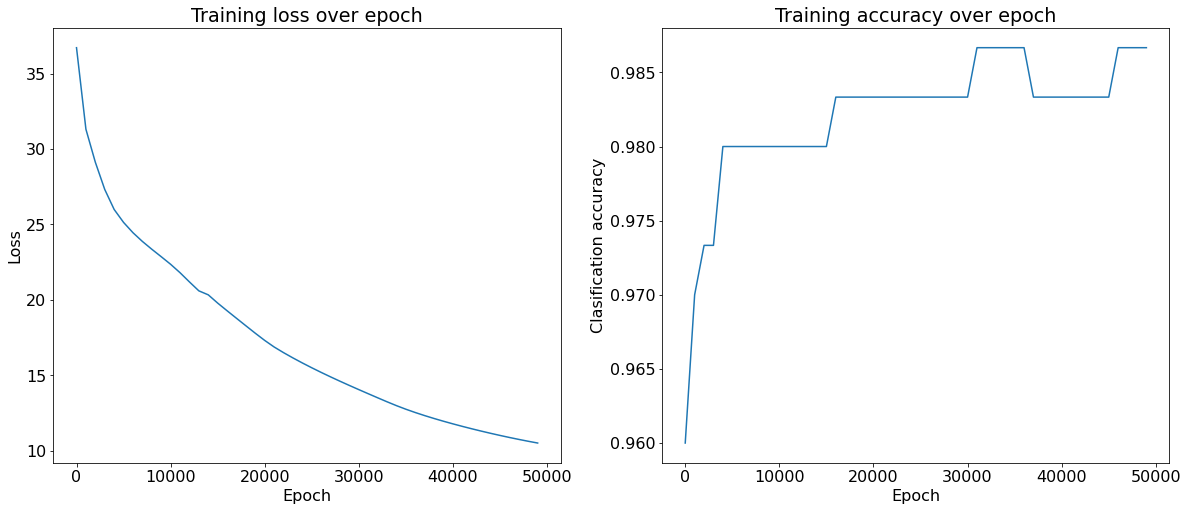

In [15]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

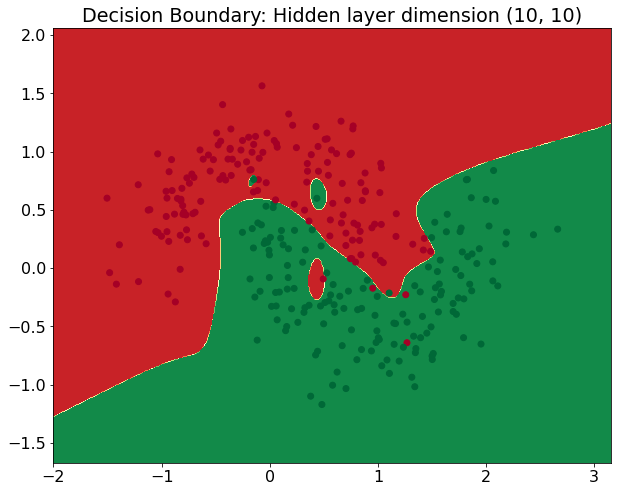

In [16]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

### Play with your networks
#### Capacity
Change the numbers of nodes in hidden layers as follows, and plot decision boundaries: (1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are the numbers of nodes in the first and second hidden layers, respectively.

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


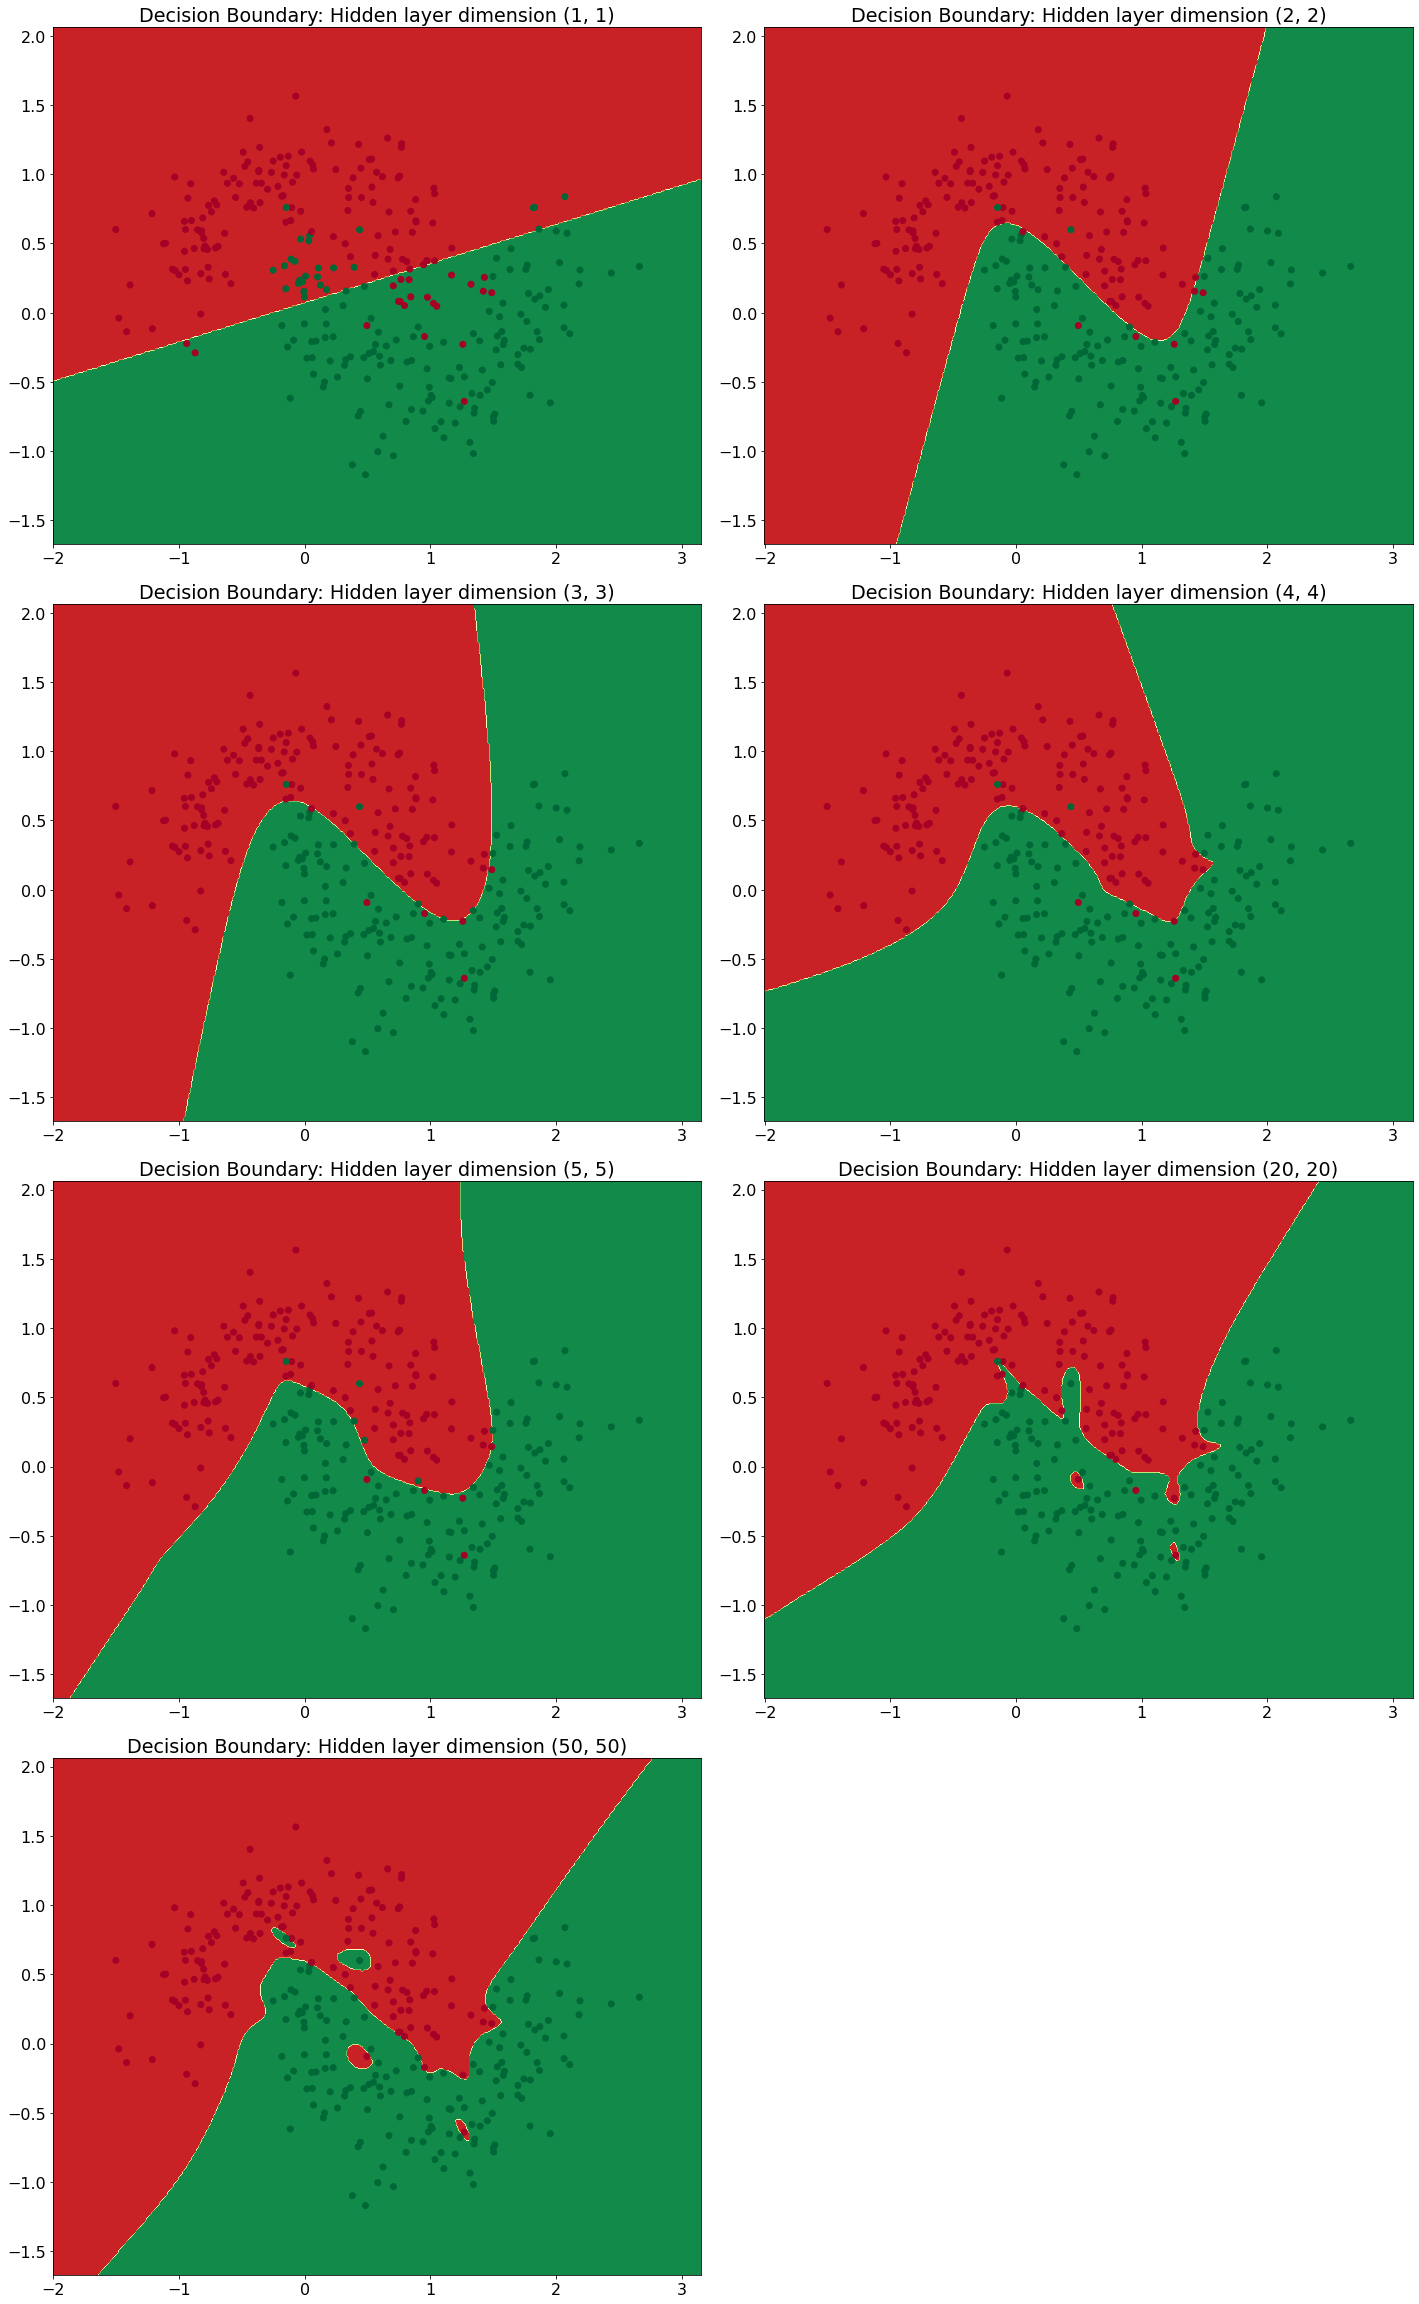

In [17]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
lr = 0.001 
epoch = 50000

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim, nn_hdim}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, epoch=epoch,  L2_norm=0.0, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Hidden layer dimension {nn_hdim, nn_hdim} ... done")

plt.gcf().set_size_inches(20, 40)
plt.tight_layout()
plt.show()

#### Regularization
Adjust the regularization coefficient as follows, and plot decision boundaries: \[0, 1e-5, 1e-3, 1e-1\].

Learning NN: Regularization 0 ... done
Learning NN: Regularization 1e-05 ... done
Learning NN: Regularization 0.001 ... done
Learning NN: Regularization 0.1 ... done


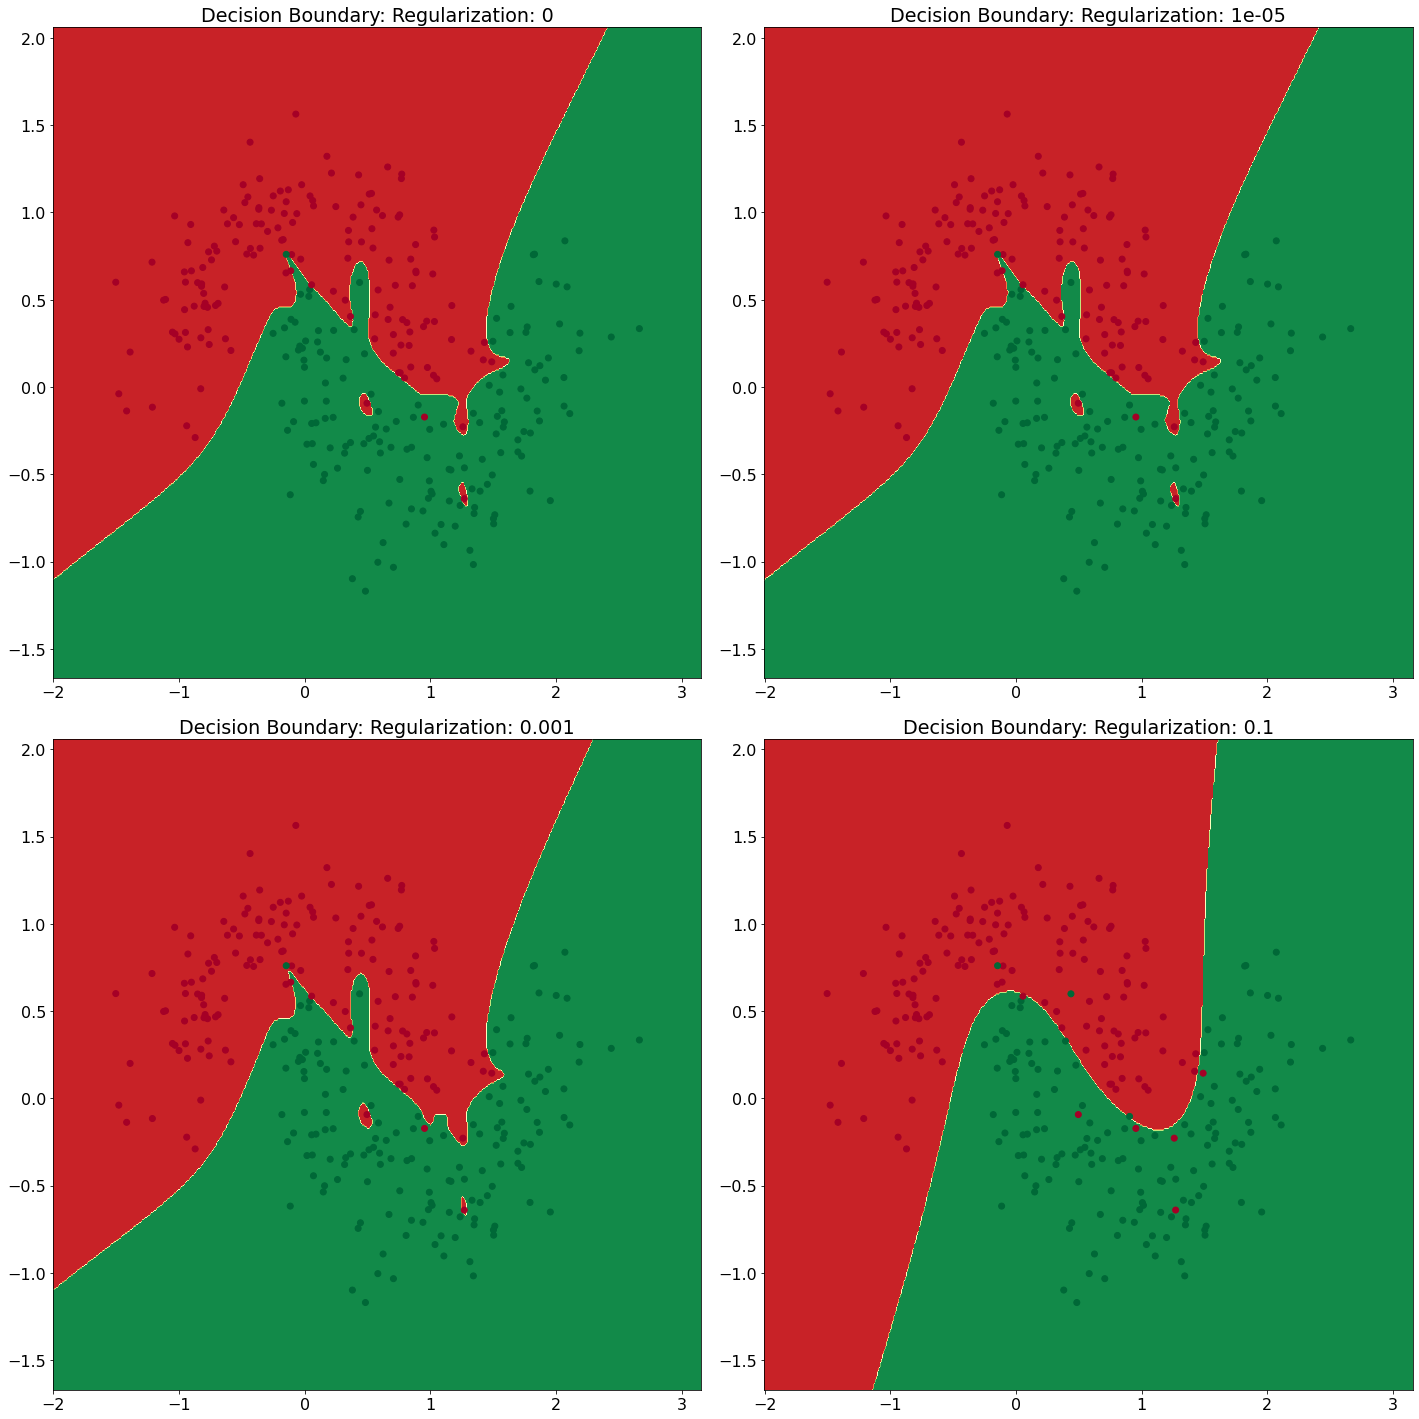

In [18]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 2
lr = 0.001 
epoch = 50000


L2_norm_list = [0, 1e-5, 1e-3, 1e-1]
for i, L2_norm in enumerate(L2_norm_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Regularization: {L2_norm}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Regularization {L2_norm} ... done")
    
plt.gcf().set_size_inches(20, 20)
plt.tight_layout()
plt.show()

#### Testing our NN on a complex synthetic dataset.

In [19]:
X, y = make_spiral(n_samples_per_class=300, n_classes=4,
                    n_rotations=1.5, gap_between_spiral=0.7, noise=1.2,
                    gap_between_start_point=0.1, equal_interval=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

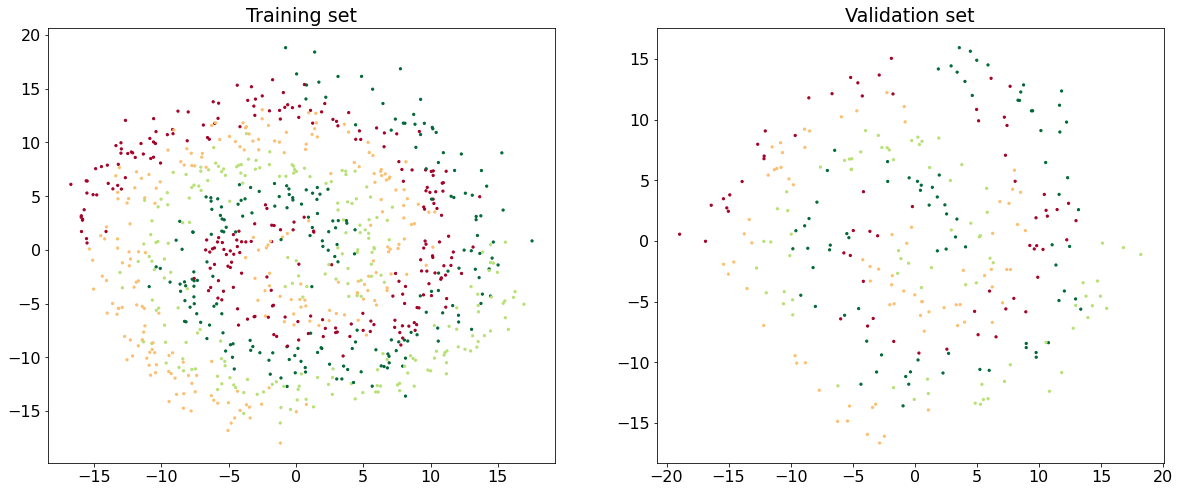

In [20]:
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], s = 5, c=y_train, cmap=plt.cm.RdYlGn)
plt.title('Training set')
plt.subplot(1, 2, 2)
plt.scatter(X_val[:,0], X_val[:,1], s = 5, c=y_val, cmap=plt.cm.RdYlGn)
plt.title('Validation set')
plt.gcf().set_size_inches(20, 8)

In [21]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 4
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.0001 
L2_norm = 0.1
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, X_val=X_val, y_val=y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

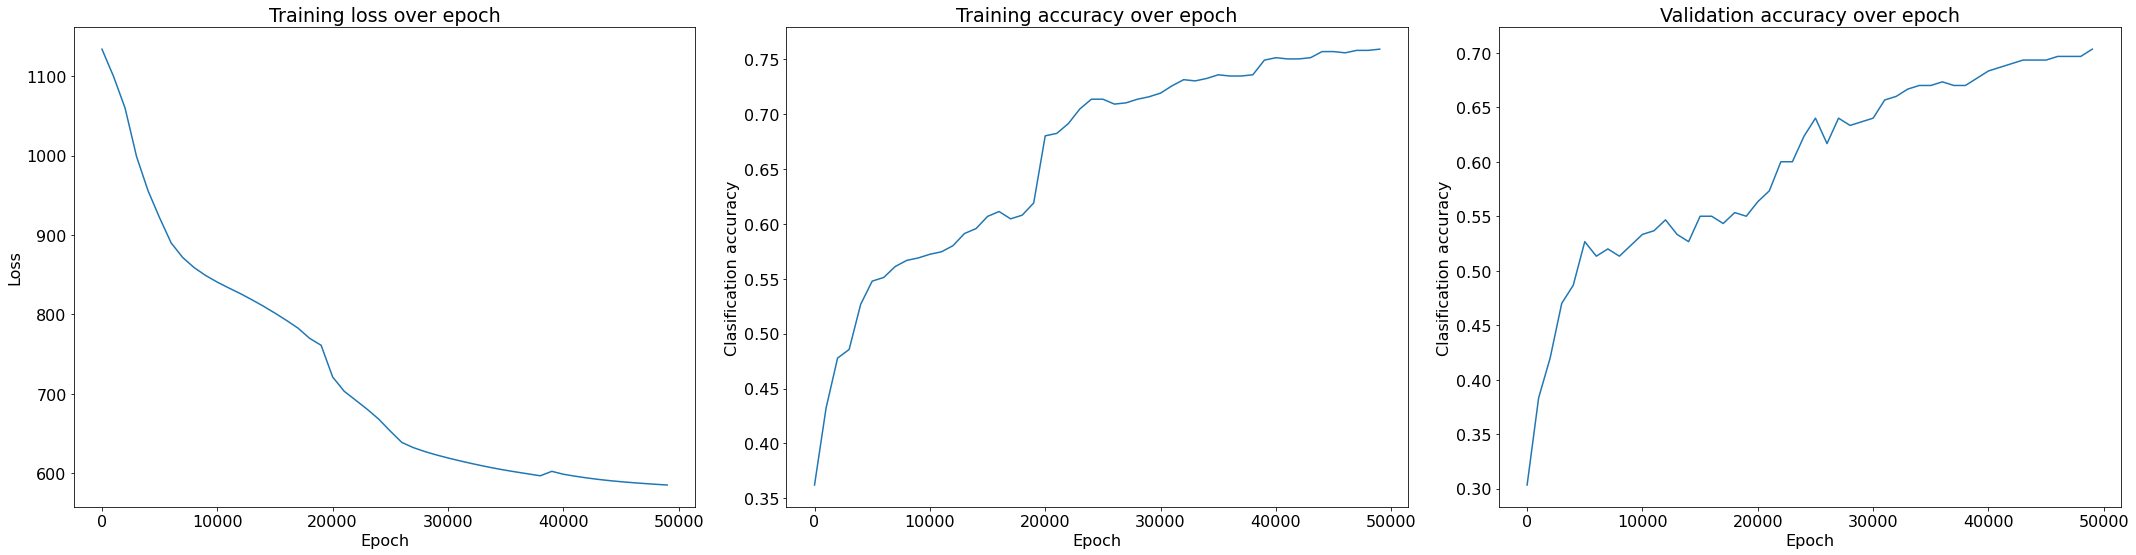

In [22]:
plt.gcf().set_size_inches(30, 8)
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 3, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.subplot(1, 3, 3)
plt.plot(np.arange(len(stats['val_acc_history'])) * 1000, stats['val_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Validation accuracy over epoch')
plt.tight_layout()

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

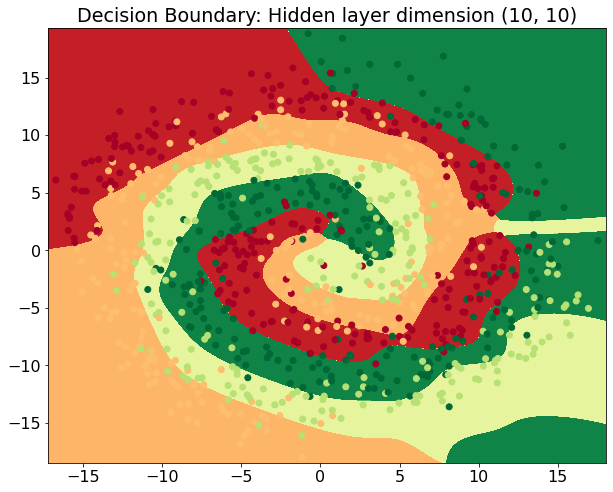

In [23]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation for a multilayer perceptron in both approaches (flat and modular codes)
- Random initialization vs Constant initialization
- Relationship between the number of hidden layers and decision boundary.
- The effect of regularization with respect to the performance.
- The effect of learning rate with respect to the performance.
- Analysis of the above results 

For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

### 1. Implementation
#### a. Flat Implementation

When the model is trained using training data, it repeats forward propagation and backward propagation for given amount of epoches. The modle calculates the predictions for given training data by forward propagating. Then, the error of prediction is calculated. Finally, the gradient of the error is distributed along the path for each weights and biases through backward propagation.

**Forward Propagation:**
Each training sample is multiplied with weight 1 (W1) and added by bias 1 (b1). This process is a linear calculation process. Then the output is given to a sigmoid layer. In this layer, each output is run through sigmoid function.

Then the result of the sigmoid function is now input again to a linear layer. Using the second set of weight (W2) and bias (b2), the output of this layer is calculated. Then, the results from the linear layer is again given to tanh layer. Just like the first layer, each result is gone through tanh function. 

Then the result is again gone through a Linear layer with W3 and b3. Now, the result is given to a softmax function. The softmax function gives the final result which is used as prediction of this model.

The model also generates a cache. In backward propagation, we need the outputs and weights, biases of each layers to calculate gradients of each layers. Therefore, these values are saved in 'cache' so that we can use them later.

**Backward Propagation:**
Backward Propagation is executed in the opposite direction. We calculate the gradients from the last layer to the first layer.

Therefore, the first layer to calculate the gradients is the 'Softmax Layer'. The softmax layer's gradient of the x (dX) is eqaul to below function.
>$\frac{\partial y_i}{\partial x_j} = y_i\cdot \left ( 1\left \{ i=j \right \}-y_j \right )$

This equation is implemented as below, using one hot format.
```python
y_onehot = np.zeros((y.shape[0], b3.shape[1]))
y_onehot[range(y.shape[0]), y] = 1
dL = (y_hat - y_onehot)
```

Now, we have to calculate the gradients of weights and bias of third linear layer. It is calculated using the upstream gradient (which was calculated above, dL). To update W3 and b3, we have to calculate the gradients for each of them. They are calculated as below.
```python
grad = dL
dW3 = np.dot(z2.T, grad) + 2*L2_norm * W3
db3 = np.sum(grad, axis=0, keepdims = True)
grad = np.dot(grad, W3.T)
```
Note that 'grad' is the gradient of the input. This is given to the next layer as upstream gradient. 

Now, the 'tanh' layer's gradient needs to be calculated. Here, we are calculating the gradient of the input X, which becomes the upstream gradient for the next layer. The gradient can be calculated using the following formula.
>$g'(x) = (1-g(x))(1+g(x))$

This formula is implemented as below.
```python
grad = (1+z2) * (1-z2)*grad
```

Now, we can calculate the Second Linear Layer's gradients for weights, bias, and input X. The exact same process for the Third Linear Layer (above) is done.

Using the upstream gradient, the gradient of the Sigmoid Layer's input X is calculated. The gradient can be calculated using the following formula
>$g'(x) = g(x)(1-g(x))$

This formula is implemented as below.
```python
grad = z1*(1-z1)*grad
```
Now this gradient is passed to the First Linear Layer. Using this gradient as upstream gradient, the gradients of the weights, bias and input X is calculated. The method is exactly same as the other Linear Layers. 

The gradients of weights and bias for each Linear Layers are recorded in 'grads' dictionary. 

Using these gradients, the weights and biases are updated in the 'train' formula as below.
```python
dW3 = grads['dW3']
dW2 = grads['dW2']
dW1 = grads['dW1']
db3 = grads['db3']
db2 = grads['db2']
db1 = grads['db1']
            
self.model['W3'] += -learning_rate * dW3
self.model['b3'] += -learning_rate * db3
self.model['W2'] += -learning_rate * dW2
self.model['b2'] += -learning_rate * db2
self.model['W1'] += -learning_rate * dW1
self.model['b1'] += -learning_rate * db1

```

The gradients are updated using 'learning rate'. When the learning rate is big, the weights and biases are updated in a big amount each time. When it's small, the opposite happens. Recall this happened in 'gradient descent'. Therefore, the learning rate tells us how much leap we'll jump each time.

**Error Calculation:**
After every forward propagation, error is calculated. It is done in compute_loss function. 

The error is made up with two parts: data loss and regularization loss. Data loss is the loss from incorrect predictions. Regularization loss is a measure of 'sizes' of the weights. We add these two to calculate the loss of each prediction.

Data loss is calculated using Cross Entrophy function.
 > $-\sum_{i=1}^N{\sum_{k=1}^K I^{(i)}_k \log(softmax(H_3^{(i)})_k)}$
 
It is implemented as below, using one hot format of the true target values.
```python
y_onehot = np.zeros((y_true.shape[0],  b3.shape[1]))
y_onehot[range(y_true.shape[0]), y_true] = 1
data_loss = -np.sum(y_onehot * np.log(y_pred))
```

Regularization loss is calculated using L2 norms. It is used to regularize the weights from getting too big. The formula for calculating regularization loss is as below.
 >  $\lambda \|W\|^2 $

It is implemented as below.
```python
reg_loss = L2_norm*(np.sum(np.multiply(W1, W1)) + np.sum(np.multiply(W2, W2)) + np.sum(np.multiply(W3, W3)))
```

By adding these two, the error is calculated.

**prediction**
The prediction is done using forward propagation. The forward propagation gives the output from softmax function. By applying argmax function to each row, we can get the predictions of the model for each row.
```python
y_hat, cache = self.forward_propagation(X)
return np.argmax(cache['h3'], axis=1)
```

#### b. Modular Implementation

Each layer is made as a class. 4 types of layers are made: Linear Layer, ReLU Layer, Tanh Layer, Sigmoid Layer. These Layers can be combined to make the model.

Each layer's class has two methods: forward and backward. To forward propagate the model, forward functions are combined. To back-propagate the model, backward functions are used. Each layer's forward and backward methods does the exactly same thing of what Flat implementation did. Forward method calculated the output and saved parameters that are needed in back-propagation. Backward method calculated the deriatives for input X (and other parameters - weights and bias in Linear Layer).

In 'forward' method of the model, various layers are ordered: Linear Layer - Sigmoid Layer - Linear Layer 2 - Tanh Layer - Linear Layer - Softmax Layer. Each layer gives two outputs. The first one is the calcualtion result. This is passed to the next layer. The second output is the 'cache' from each layers. They are stored in 'cache' dictionary. They are recorded using the layer's names. TThe final ouput from the Softmax layer is returned as y_hat.
```python
# First Linear Layer
h1, cache1 = Linear.forward(X, W1, b1)
cache['Linear1'] = cache1
# Sigmoid Layer
z1, cache2 = Sigmoid.forward(h1)
cache['Sigmoid'] = cache2

# Second Linear Layer
h2, cache3 = Linear.forward(z1, W2, b2)
cache['Linear2'] = cache3
# Tanh Layer
z2, cache4 = Tanh.forward(h2)
cache['Tanh'] = cache4
        
# Third Linear Layer
out, cache5 = Linear.forward(z2, W3, b3)
cache['Linear3'] = cache5
        
#################  

if y is None:
    # Softmax Layer
    y_hat = SoftmaxWithCEloss.forward(out)
    return y_hat
else: 
    # Softmax Layer
    loss, cache['SoftmaxWithCEloss'] = SoftmaxWithCEloss.forward(out, y)
    return cache, loss
```

In 'backward' method of the model, back-propagation is done. Using caches from each layers, layer's 'backward' method is called. As mentioned above, 'backward' method calculates gradients. The calculated gradients are passed to the next layer as upstream gradient. For Linear Layers, gradients of weights and bias is also calculated. They are stored in 'grads' dictionary. The gradients of bias and weights are used to update them. This process is the exact same thing that happened in flat implementation.
```python
dL = SoftmaxWithCEloss.backward(cache['SoftmaxWithCEloss'])
        
# Linear 3
dx, dW3, db3 = Linear.backward(cache['Linear3'], dL)
dW3 += 2*L2_norm * self.model['W3']
        
# tanh
dx = Tanh.backward(cache['Tanh'], dx)
        
# Linear 2
dx, dW2, db2 = Linear.backward(cache['Linear2'], dx)
dW2 += 2*L2_norm * self.model['W2']
        
#  Sigmoid
dx = Sigmoid.backward(cache['Sigmoid'], dx)
        
# Linear 1
dx, dW1, db1 = Linear.backward(cache['Linear1'], dx)
dW1 += 2*L2_norm * self.model['W1']
```

The model's train method repeatedly calls 'forward' and 'backward' method of the model. By repeating for the given amount of times, the model is trained.

### 2. Random Initialization vs. Constant Initialization

In [24]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model_random = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats_random = model_random.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)


np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model_constant = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="constant")
stats_constant = model_constant.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

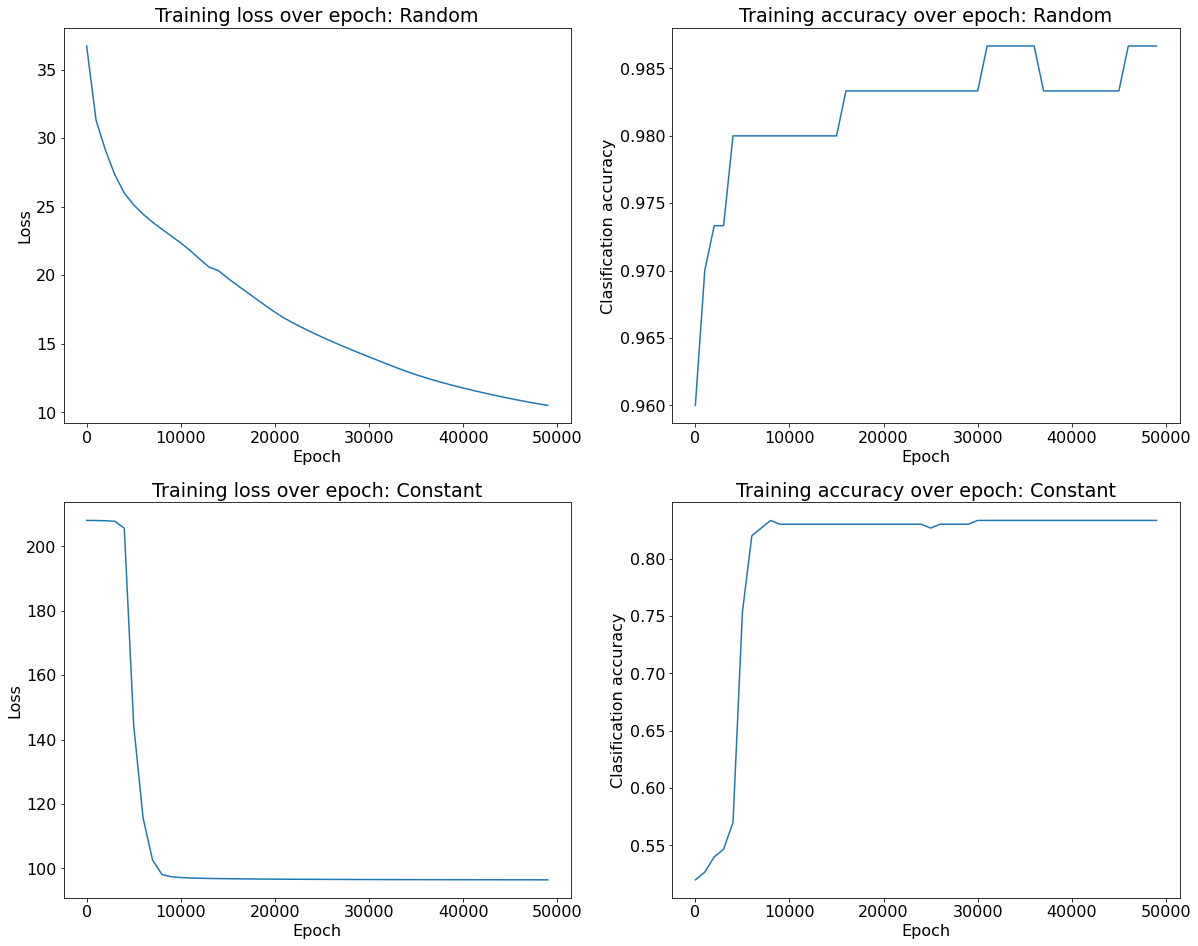

In [25]:
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(stats_random['loss_history'])) * 1000, stats_random['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch: Random')
plt.subplot(2, 2, 2)
plt.plot(np.arange(len(stats_random['train_acc_history'])) * 1000, stats_random['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch: Random')

plt.subplot(2, 2, 3)
plt.plot(np.arange(len(stats_constant['loss_history'])) * 1000, stats_constant['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch: Constant')
plt.subplot(2, 2, 4)
plt.plot(np.arange(len(stats_constant['train_acc_history'])) * 1000, stats_constant['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch: Constant')
plt.gcf().set_size_inches(20, 16)

Two Neural Network models, each initialized randomly or with constant values were trained with same conditions. The above figures show the loss and accuracy of each models. 

We can see that training loss decreases steadily when random initialization was used. On the other hand, training loss did not decrease from some point. As a result, the accuracy remained at about 0.8.

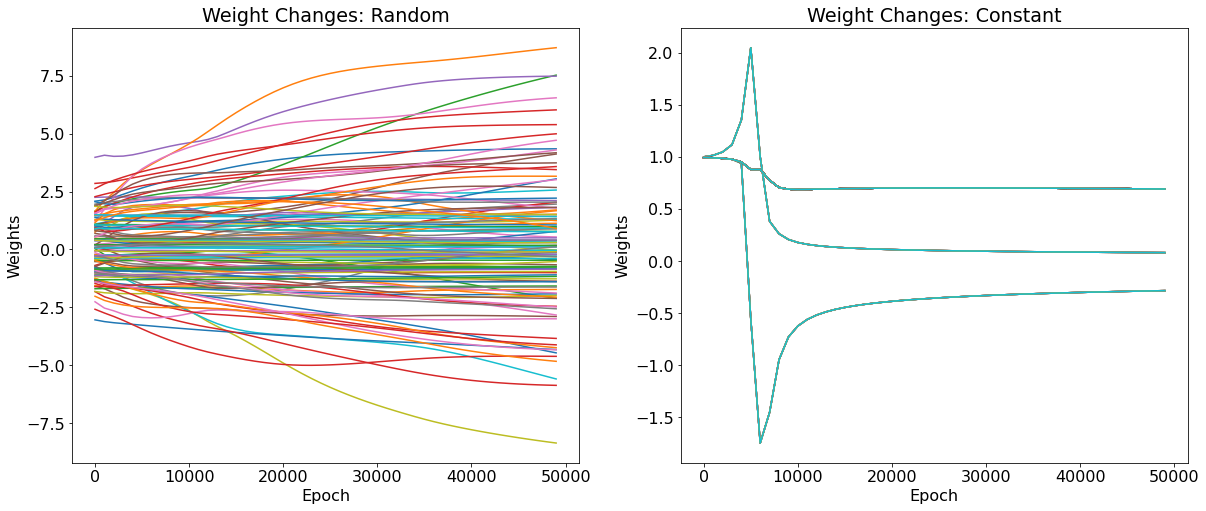

In [26]:
w1_history_random = np.array(stats_random['w1_history'])
w2_history_random = np.array(stats_random['w2_history'])
w1_history_constant = np.array(stats_constant['w1_history'])
w2_history_constant = np.array(stats_constant['w2_history'])

plt.subplot(1, 2, 1)
history1 = stats_random
for i in range(len(w1_history_random[0, :, 0])):
    for m in range(len(w1_history_random[0, 0, :])):
        plt.plot(np.arange(len(w1_history_random[:, i, m])) * 1000, w1_history_random[:, i, m])

for i in range(len(w2_history_random[0, :, 0])):
    for m in range(len(w2_history_random[0, 0, :])):
        plt.plot(np.arange(len(w2_history_random[:, i, m])) * 1000, w2_history_random[:, i, m])

plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.title('Weight Changes: Random')
plt.subplot(1, 2, 2)
history1 = stats_random
for i in range(len(w1_history_constant[0, :, 0])):
    for m in range(len(w1_history_constant[0, 0, :])):
        plt.plot(np.arange(len(w1_history_constant[:, i, m])) * 1000, w1_history_constant[:, i, m])

for i in range(len(w2_history_constant[0, :, 0])):
    for m in range(len(w2_history_constant[0, 0, :])):
        plt.plot(np.arange(len(w2_history_constant[:, i, m])) * 1000, w2_history_constant[:, i, m])
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.title('Weight Changes: Constant')
plt.gcf().set_size_inches(20, 8)

We can see why two models showed different accuracy trends from the figures above. The figures above show how each weights changed as training was repeated. When random initialization was used, the weights showed various changes. As a result, each weights were having very different values at the end. However, when constant initialization was used, weights did not show much difference. The weights were all equal.

This happened because when constant initialization was used, all weights and biases were trained with same values. The gradients they made were all equal. For example, the first Linear Layer generates 10 outputs from 2 inputs. However, when constant initialization is used, the 10 outputs are all equal. The equal outputs are passed to the next Linear Layer, which also makes equal outputs. As a result, all weights in a layer are trained together. 

This makes the neural network to work as if there are only one parameter. Therefore, we should not use constant initialization in Neural Networks.

### 3. Number of Hidden Layers and Decision Boundaries.

In [27]:
class NeuralNetwork_module_2(object):
    def __init__(self, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random"):
        """
        Descriptions:
            W1: First layer weights
            b1: First layer biases
            W2: Second layer weights
            b2: Second layer biases
            W3: Third layer weights
            b3: Third layer biases
        
        Args:
            nn_input_dim: (int) The dimension D of the input data.
            nn_hdim1: (int) The number of neurons  in the hidden layer H1.
            nn_hdim2: (int) The number of neurons H2 in the hidden layer H1.
            nn_output_dim: (int) The number of classes C.
            init: (str) initialization method used, {'random', 'constant'}
        
        Returns:
            
        """
        # reset seed before start
        np.random.seed(0)
        self.model = {}

        if init == "random":
            self.model['W1'] = np.random.randn(nn_input_dim, nn_hdim1)
            self.model['b1'] = np.zeros((1, nn_hdim1))
            self.model['W11'] = np.random.randn(nn_hdim1, nn_output_dim)
            self.model['b11'] = np.zeros((1, nn_output_dim))

        elif init == "constant":
            self.model['W1'] = np.ones((nn_input_dim, nn_hdim1))
            self.model['b1'] = np.zeros((1, nn_hdim1))
            self.model['W2'] = np.ones((nn_hdim1, nn_hdim2))
            self.model['b2'] = np.zeros((1, nn_hdim2))
            self.model['W3'] = np.ones((nn_hdim2, nn_output_dim))
            self.model['b3'] = np.zeros((1, nn_output_dim))

    def forward(self, X, y=None):
        """
        Forward pass of the network to compute the hidden layer features and classification scores. 
        
        Args:
            X: Input data of shape (N, D)
            y: (numpy array) One-hot encoding of training labels (N, C) or None
            
        Returns:
            if y is None:
                y_hat: (numpy array) Array of shape (N, C) giving the classification scores for X
            else:
                loss: (float) data loss
                cache: Values needed to compute gradients
            
        """

        W1, b1, W11, b11 = self.model['W1'], self.model['b1'],  self.model['W11'], self.model['b11']
        cache = {}
        
        ### CODE HERE ###
        # raise NotImplementedError("Erase this line and write down your code.")#
        h1, cache1 = Linear.forward(X, W1, b1)
        cache['Linear1'] = cache1
        z1, cache2 = Sigmoid.forward(h1)
        cache['Sigmoid1'] = cache2
        
        
        out, cache5 = Linear.forward(z1, W11, b11)
        cache['Linear11'] = cache5
        
        #################  

        if y is None:
            y_hat = SoftmaxWithCEloss.forward(out)
            return y_hat
        else: 
            loss, cache['SoftmaxWithCEloss'] = SoftmaxWithCEloss.forward(out, y)
            return cache, loss
    
    def backward(self, cache, L2_norm=0.0):
        """
        Compute the gradients
        
        Args:
            cache: (dict) Values needed to compute gradients
            L2_norm: (int) L2 normalization coefficient
            
        Returns:
            grads: (dict) Dictionary mapping parameter names to gradients of model parameters
            
        """
        ### CODE HERE ###
        # raise NotImplementedError("Erase this line and write down your code.")#
        dL = SoftmaxWithCEloss.backward(cache['SoftmaxWithCEloss'])
        
        # Linear 3
        dx, dW11, db11 = Linear.backward(cache['Linear11'], dL)
        dW11 += 2*L2_norm * self.model['W11']
        
        
        #  Sigmoid
        dx = Sigmoid.backward(cache['Sigmoid1'], dx)
        
        # Linear 1
        dx, dW1, db1 = Linear.backward(cache['Linear1'], dx)
        dW1 += 2*L2_norm * self.model['W1']
        
        
        ###########################################
        grads = dict()
        grads['dW11'] = dW11
        grads['db11'] = db11
        grads['dW1'] = dW1
        grads['db1'] = db1

        return grads

    def train(self, X_train, y_train, X_val=None, y_val=None, learning_rate=1e-3, L2_norm=0.0, epoch=20000, print_loss=True):
        """
        Descriptions:
            Train the neural network using gradient descent.
        
        Args:
            X_train: (numpy array) training data (N, D)
            X_val: (numpy array) validation data (N, D)
            y_train: (numpy array) training labels (N,)
            y_val: (numpy array) valiation labels (N, )
            y_pred: (numpy array) Predicted target (N,)
            learning_rate: (float) Scalar giving learning rate for optimization
            L2_norm: (float) Scalar giving regularization strength.
            epoch: (int) Number of epoch to take
            print_loss: (bool) if true print loss during optimization

        Returns:
            A dictionary giving statistics about the training process
        """

        loss_history = []
        train_acc_history = []
        val_acc_history = []

        y_train_onehot = np.eye(y_train.max()+1)[y_train]
        
        for it in range(epoch):
            ### CODE HERE ###
            # raise NotImplementedError("Erase this line and write down your code.")
            W1, W11 = self.model['W1'], self.model['W11']
            
            cache, data_loss = self.forward(X_train, y_train)
            reg_loss = L2_norm*(np.sum(W1*W1) + np.sum(W11*W11))
            loss = data_loss + reg_loss
            
            grads = self.backward(cache, L2_norm)
            
            dW11 = grads['dW11']
            dW1 = grads['dW1']
            
            db11 = grads['db11']
            db1 = grads['db1']
            
            self.model['W11'] += -learning_rate * dW11
            self.model['b11'] += -learning_rate * db11
            self.model['W1'] += -learning_rate * dW1
            self.model['b1'] += -learning_rate * db1
            ################# 
            if (it+1) % 1000 == 0:
                loss_history.append(loss)

                y_train_pred = self.predict(X_train)
                train_acc = np.average(y_train==y_train_pred)
                train_acc_history.append(train_acc)
                
                if X_val is not None:
                    y_val_pred = self.predict(X_val)
                    val_acc = np.average(y_val==y_val_pred)
                    val_acc_history.append(val_acc)

            if print_loss and (it+1) % 1000 == 0:
                print(f"Loss (epoch {it+1}): {loss}")

         
        if X_val is not None:
            return {
                'loss_history': loss_history,
                'train_acc_history': train_acc_history,
                'val_acc_history': val_acc_history,
            }
        else:
            return {
                'loss_history': loss_history,
                'train_acc_history': train_acc_history,
            }

    def predict(self, X):
        ### CODE HERE ###
        #raise NotImplementedError("Erase this line and write down your code.")
        y_hat = self.forward(X)
        
        return np.argmax(y_hat, axis=1)
        
        #################  

class NeuralNetwork_module_10(object):
    def __init__(self, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random"):
        """
        Descriptions:
            W1: First layer weights
            b1: First layer biases
            W2: Second layer weights
            b2: Second layer biases
            W3: Third layer weights
            b3: Third layer biases
        
        Args:
            nn_input_dim: (int) The dimension D of the input data.
            nn_hdim1: (int) The number of neurons  in the hidden layer H1.
            nn_hdim2: (int) The number of neurons H2 in the hidden layer H1.
            nn_output_dim: (int) The number of classes C.
            init: (str) initialization method used, {'random', 'constant'}
        
        Returns:
            
        """
        # reset seed before start
        np.random.seed(0)
        self.model = {}

        if init == "random":
            self.model['W1'] = np.random.randn(nn_input_dim, nn_hdim1)
            self.model['b1'] = np.zeros((1, nn_hdim1))
            self.model['W2'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b2'] = np.zeros((1, nn_hdim1))
            self.model['W3'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b3'] = np.zeros((1, nn_hdim1))
            self.model['W4'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b4'] = np.zeros((1, nn_hdim1))
            self.model['W5'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b5'] = np.zeros((1, nn_hdim1))
            self.model['W6'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b6'] = np.zeros((1, nn_hdim1))
            self.model['W7'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b7'] = np.zeros((1, nn_hdim1))
            self.model['W8'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b8'] = np.zeros((1, nn_hdim1))
            self.model['W9'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b9'] = np.zeros((1, nn_hdim1))
            self.model['W10'] = np.random.randn(nn_hdim1, nn_hdim1)
            self.model['b10'] = np.zeros((1, nn_hdim1))
            self.model['W11'] = np.random.randn(nn_hdim1, nn_output_dim)
            self.model['b11'] = np.zeros((1, nn_output_dim))

        elif init == "constant":
            self.model['W1'] = np.ones((nn_input_dim, nn_hdim1))
            self.model['b1'] = np.zeros((1, nn_hdim1))
            self.model['W2'] = np.ones((nn_hdim1, nn_hdim2))
            self.model['b2'] = np.zeros((1, nn_hdim2))
            self.model['W3'] = np.ones((nn_hdim2, nn_output_dim))
            self.model['b3'] = np.zeros((1, nn_output_dim))

    def forward(self, X, y=None):
        """
        Forward pass of the network to compute the hidden layer features and classification scores. 
        
        Args:
            X: Input data of shape (N, D)
            y: (numpy array) One-hot encoding of training labels (N, C) or None
            
        Returns:
            if y is None:
                y_hat: (numpy array) Array of shape (N, C) giving the classification scores for X
            else:
                loss: (float) data loss
                cache: Values needed to compute gradients
            
        """

        W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, W7, b7, W8, b8, W9, b9, W10, b10, W11, b11 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2'], self.model['W3'], self.model['b3'], self.model['W4'], self.model['b4'], self.model['W5'], self.model['b5'], self.model['W6'], self.model['b6'], self.model['W7'], self.model['b7'], self.model['W8'], self.model['b8'], self.model['W9'], self.model['b9'], self.model['W10'], self.model['b10'], self.model['W11'], self.model['b11']
        cache = {}
        
        ### CODE HERE ###
        # raise NotImplementedError("Erase this line and write down your code.")#
        h1, cache1 = Linear.forward(X, W1, b1)
        cache['Linear1'] = cache1
        z1, cache2 = Sigmoid.forward(h1)
        cache['Sigmoid1'] = cache2
        
        h2, cache3 = Linear.forward(z1, W2, b2)
        cache['Linear2'] = cache3
        z2, cache4 = Tanh.forward(h2)
        cache['Tanh2'] = cache4
        
        
        h3, cache4 = Linear.forward(z2, W3, b3)
        cache['Linear3'] = cache4
        z3, cache5 = Sigmoid.forward(h3)
        cache['Sigmoid3'] = cache5
        
        h4, cache6 = Linear.forward(z3, W4, b4)
        cache['Linear4'] = cache6
        z4, cache4 = Tanh.forward(h4)
        cache['Tanh4'] = cache4
        
        
        
        h5, cache5 = Linear.forward(z4, W5, b5)
        cache['Linear5'] = cache5
        z5, cache5 = Sigmoid.forward(h5)
        cache['Sigmoid5'] = cache5
        
        h6, cache6 = Linear.forward(z5, W6, b6)
        cache['Linear6'] = cache6
        z6, cache6 = Tanh.forward(h6)
        cache['Tanh6'] = cache6
        
        
        
        h7, cache7 = Linear.forward(z6, W7, b7)
        cache['Linear7'] = cache7
        z7, cache7 = Sigmoid.forward(h7)
        cache['Sigmoid7'] = cache7
        
        h8, cache8 = Linear.forward(z7, W8, b8)
        cache['Linear8'] = cache8
        z8, cache8 = Tanh.forward(h8)
        cache['Tanh8'] = cache8
        
        
        
        h9, cache9 = Linear.forward(z8, W9, b9)
        cache['Linear9'] = cache9
        z9, cache9 = Sigmoid.forward(h9)
        cache['Sigmoid9'] = cache9
        
        h10, cache10 = Linear.forward(z9, W10, b10)
        cache['Linear10'] = cache10
        z10, cache10 = Tanh.forward(h10)
        cache['Tanh10'] = cache10
        
        
        out, cache5 = Linear.forward(z10, W11, b11)
        cache['Linear11'] = cache5
        
        #################  

        if y is None:
            y_hat = SoftmaxWithCEloss.forward(out)
            return y_hat
        else: 
            loss, cache['SoftmaxWithCEloss'] = SoftmaxWithCEloss.forward(out, y)
            return cache, loss
    
    def backward(self, cache, L2_norm=0.0):
        """
        Compute the gradients
        
        Args:
            cache: (dict) Values needed to compute gradients
            L2_norm: (int) L2 normalization coefficient
            
        Returns:
            grads: (dict) Dictionary mapping parameter names to gradients of model parameters
            
        """
        ### CODE HERE ###
        # raise NotImplementedError("Erase this line and write down your code.")#
        dL = SoftmaxWithCEloss.backward(cache['SoftmaxWithCEloss'])
        
        # Linear 3
        dx, dW11, db11 = Linear.backward(cache['Linear11'], dL)
        dW11 += 2*L2_norm * self.model['W11']
        
        # tanh
        dx = Tanh.backward(cache['Tanh10'], dx)
        
        # Linear 2
        dx, dW10, db10 = Linear.backward(cache['Linear10'], dx)
        dW10 += 2*L2_norm * self.model['W10']
        
        #  Sigmoid
        dx = Sigmoid.backward(cache['Sigmoid9'], dx)
        # Linear 3
        dx, dW9, db9 = Linear.backward(cache['Linear9'], dx)
        dW9 += 2*L2_norm * self.model['W9']
        
        # tanh
        dx = Tanh.backward(cache['Tanh8'], dx)
        
        # Linear 2
        dx, dW8, db8 = Linear.backward(cache['Linear8'], dx)
        dW8 += 2*L2_norm * self.model['W8']
        
        #  Sigmoid
        dx = Sigmoid.backward(cache['Sigmoid7'], dx)
        
        # Linear 1
        dx, dW7, db7 = Linear.backward(cache['Linear7'], dx)
        dW7 += 2*L2_norm * self.model['W7']
        
        # tanh
        dx = Tanh.backward(cache['Tanh6'], dx)
        
        # Linear 2
        dx, dW6, db6 = Linear.backward(cache['Linear6'], dx)
        dW6 += 2*L2_norm * self.model['W6']
        
        #  Sigmoid
        dx = Sigmoid.backward(cache['Sigmoid5'], dx)
        
        # Linear 1
        dx, dW5, db5 = Linear.backward(cache['Linear5'], dx)
        dW5 += 2*L2_norm * self.model['W5']
        # tanh
        dx = Tanh.backward(cache['Tanh4'], dx)
        
        # Linear 2
        dx, dW4, db4 = Linear.backward(cache['Linear4'], dx)
        dW4 += 2*L2_norm * self.model['W4']
        
        #  Sigmoid
        dx = Sigmoid.backward(cache['Sigmoid3'], dx)
        
        # Linear 1
        dx, dW3, db3 = Linear.backward(cache['Linear3'], dx)
        dW3 += 2*L2_norm * self.model['W3']
        
        # tanh
        dx = Tanh.backward(cache['Tanh2'], dx)
        
        # Linear 2
        dx, dW2, db2 = Linear.backward(cache['Linear2'], dx)
        dW2 += 2*L2_norm * self.model['W2']
        
        #  Sigmoid
        dx = Sigmoid.backward(cache['Sigmoid1'], dx)
        
        # Linear 1
        dx, dW1, db1 = Linear.backward(cache['Linear1'], dx)
        dW1 += 2*L2_norm * self.model['W1']
        
        
        ###########################################
        grads = dict()
        grads['dW11'] = dW11
        grads['db11'] = db11
        grads['dW10'] = dW10
        grads['db10'] = db10
        grads['dW9'] = dW9
        grads['db9'] = db9
        grads['dW8'] = dW8
        grads['db8'] = db8
        grads['dW7'] = dW7
        grads['db7'] = db7
        grads['dW6'] = dW6
        grads['db6'] = db6
        grads['dW5'] = dW5
        grads['db5'] = db5
        grads['dW4'] = dW4
        grads['db4'] = db4
        grads['dW3'] = dW3
        grads['db3'] = db3
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW1'] = dW1
        grads['db1'] = db1

        return grads

    def train(self, X_train, y_train, X_val=None, y_val=None, learning_rate=1e-3, L2_norm=0.0, epoch=20000, print_loss=True):
        """
        Descriptions:
            Train the neural network using gradient descent.
        
        Args:
            X_train: (numpy array) training data (N, D)
            X_val: (numpy array) validation data (N, D)
            y_train: (numpy array) training labels (N,)
            y_val: (numpy array) valiation labels (N, )
            y_pred: (numpy array) Predicted target (N,)
            learning_rate: (float) Scalar giving learning rate for optimization
            L2_norm: (float) Scalar giving regularization strength.
            epoch: (int) Number of epoch to take
            print_loss: (bool) if true print loss during optimization

        Returns:
            A dictionary giving statistics about the training process
        """

        loss_history = []
        train_acc_history = []
        val_acc_history = []

        y_train_onehot = np.eye(y_train.max()+1)[y_train]
        
        for it in range(epoch):
            ### CODE HERE ###
            # raise NotImplementedError("Erase this line and write down your code.")
            W1, W2, W3, W4, W5, W6, W7, W8, W9, W10, W11 = self.model['W1'], self.model['W2'], self.model['W3'], self.model['W4'], self.model['W5'], self.model['W6'], self.model['W7'], self.model['W8'], self.model['W9'], self.model['W10'], self.model['W11']
            
            cache, data_loss = self.forward(X_train, y_train)
            reg_loss = L2_norm*(np.sum(W1*W1) + np.sum(W2*W2) + np.sum(W3*W3) + np.sum(W4*W4) + np.sum(W5*W5) + np.sum(W6*W6) + np.sum(W7*W7) + np.sum(W8*W8) + np.sum(W9*W9) + np.sum(W10*W10) + np.sum(W11*W11))
            loss = data_loss + reg_loss
            
            grads = self.backward(cache, L2_norm)
            
            dW11 = grads['dW11']
            dW10 = grads['dW10']
            dW9 = grads['dW9']
            dW8 = grads['dW8']
            dW7 = grads['dW7']
            dW6 = grads['dW6']
            dW5 = grads['dW5']
            dW4 = grads['dW4']
            dW3 = grads['dW3']
            dW2 = grads['dW2']
            dW1 = grads['dW1']
            
            db11 = grads['db11']
            db10 = grads['db10']
            db9 = grads['db9']
            db8 = grads['db8']
            db7 = grads['db7']
            db6 = grads['db6']
            db5 = grads['db5']
            db4 = grads['db4']
            db3 = grads['db3']
            db2 = grads['db2']
            db1 = grads['db1']
            
            self.model['W11'] += -learning_rate * dW11
            self.model['b11'] += -learning_rate * db11
            self.model['W10'] += -learning_rate * dW10
            self.model['b10'] += -learning_rate * db10
            self.model['W9'] += -learning_rate * dW9
            self.model['b9'] += -learning_rate * db9
            self.model['W8'] += -learning_rate * dW8
            self.model['b8'] += -learning_rate * db8
            self.model['W7'] += -learning_rate * dW7
            self.model['b7'] += -learning_rate * db7
            self.model['W6'] += -learning_rate * dW6
            self.model['b6'] += -learning_rate * db6
            self.model['W5'] += -learning_rate * dW5
            self.model['b5'] += -learning_rate * db5
            self.model['W4'] += -learning_rate * dW4
            self.model['b4'] += -learning_rate * db4
            self.model['W3'] += -learning_rate * dW3
            self.model['b3'] += -learning_rate * db3
            self.model['W2'] += -learning_rate * dW2
            self.model['b2'] += -learning_rate * db2
            self.model['W1'] += -learning_rate * dW1
            self.model['b1'] += -learning_rate * db1
            ################# 
            if (it+1) % 1000 == 0:
                loss_history.append(loss)

                y_train_pred = self.predict(X_train)
                train_acc = np.average(y_train==y_train_pred)
                train_acc_history.append(train_acc)
                
                if X_val is not None:
                    y_val_pred = self.predict(X_val)
                    val_acc = np.average(y_val==y_val_pred)
                    val_acc_history.append(val_acc)

            if print_loss and (it+1) % 1000 == 0:
                print(f"Loss (epoch {it+1}): {loss}")

         
        if X_val is not None:
            return {
                'loss_history': loss_history,
                'train_acc_history': train_acc_history,
                'val_acc_history': val_acc_history,
            }
        else:
            return {
                'loss_history': loss_history,
                'train_acc_history': train_acc_history,
            }

    def predict(self, X):
        ### CODE HERE ###
        #raise NotImplementedError("Erase this line and write down your code.")
        y_hat = self.forward(X)
        
        return np.argmax(y_hat, axis=1)
        
        #################  

This is a new model which uses more hidden layers.

In [28]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.0001
epoch = 50000

model2 = NeuralNetwork_module_2(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats2 = model2.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

model10 = NeuralNetwork_module_10(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats10 = model10.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)


The model was trained with equal settings.

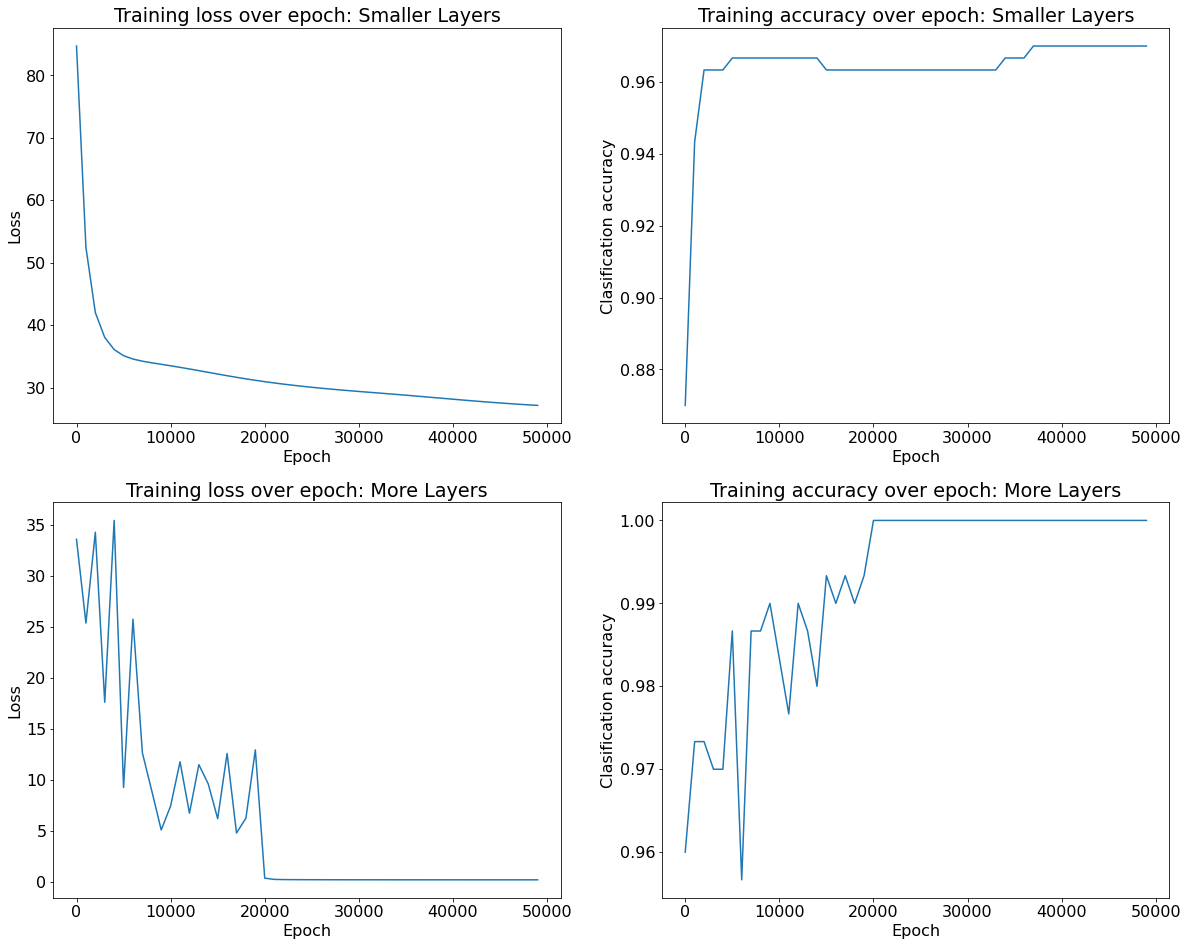

In [29]:
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(stats2['loss_history'])) * 1000, stats2['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch: Smaller Layers')
plt.subplot(2, 2, 2)
plt.plot(np.arange(len(stats2['train_acc_history'])) * 1000, stats2['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch: Smaller Layers')
plt.subplot(2, 2, 3)
plt.plot(np.arange(len(stats10['loss_history'])) * 1000, stats10['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch: More Layers')
plt.subplot(2, 2, 4)
plt.plot(np.arange(len(stats10['train_acc_history'])) * 1000, stats10['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch: More Layers')
plt.gcf().set_size_inches(20, 16)

We can see that the model with more layers showed clear increase in train accuracy. 

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

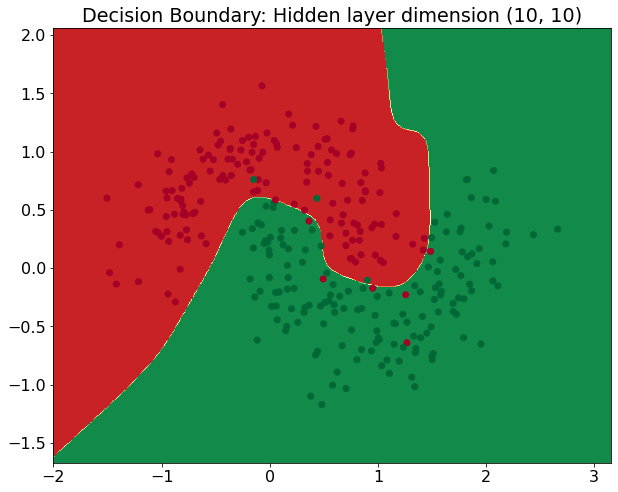

In [30]:
plot_decision_boundary(lambda x: model2.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

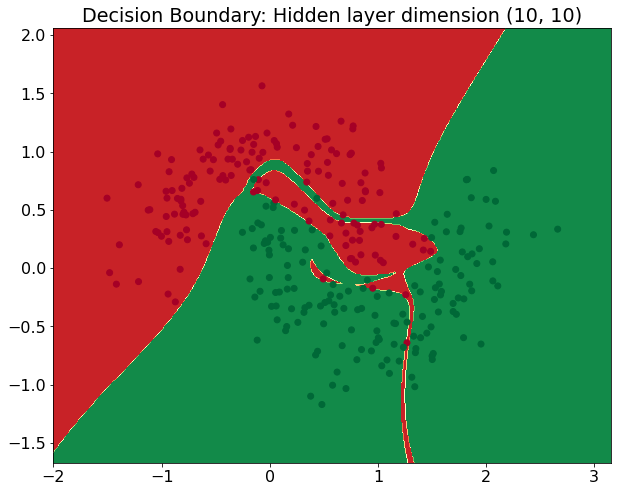

In [31]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model10.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

This is because the model was able to make much more complex decision boundary. We can see that the decision bounday is much more complex, and completely not linear. This tells us that more hidden layers make more curves in the decision boundary.

Note a red line downwards in the middle. This boundary was made becasue of two red points (Which the original model predicted inaccurately). The new model with more layers were able to draw a line here to distinguish these points. However, if these points are 'noise' in this dataset, the model is trying to overfit in the training data.

In [32]:
model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

X_test, y_test = sklearn.datasets.make_moons(500, noise = 0.25)

y_test_pred = model.predict(X_test)
print(f"Original Model: {np.average(y_test==y_test_pred)}")

y_test_pred = model2.predict(X_test)
print(f"Smaller Layers Model: {np.average(y_test==y_test_pred)}")

y_test_pred = model10.predict(X_test)
print(f"Extra Layers Model: {np.average(y_test==y_test_pred)}")


Original Model: 0.894
Smaller Layers Model: 0.906
Extra Layers Model: 0.89


However, test accuracy shows that more layers does not help in test accruacy. This is because the problem was not that complex at all. Therefore, the extra layers weren't needed to make the decision boundary for this problem.

### 4. Effect of Regularization

The results from each models with different L2_norm parameters show the effect of regularization. When the parameter was very small, the boundary showed complex lines and tweaks. However, when regularization parameter increased (especially when it was 0.1), the boundary was very smooth.

This is becasue the increased regularization parameter stopped weights from getting too big. The tweaks in the boundaries are made because of big weights. To stop this, L2 norm on weights were added to error, regularizing weights. As a result, with big regularization parameters make the decision boundary smooth.

### 5. Effect of Learning Rate



Learning NN: Learning Rate 1e-05 ... done
Test Accuraty: 0.922
Learning NN: Learning Rate 0.0001 ... done
Test Accuraty: 0.91
Learning NN: Learning Rate 0.001 ... done
Test Accuraty: 0.898
Learning NN: Learning Rate 0.01 ... done
Test Accuraty: 0.902


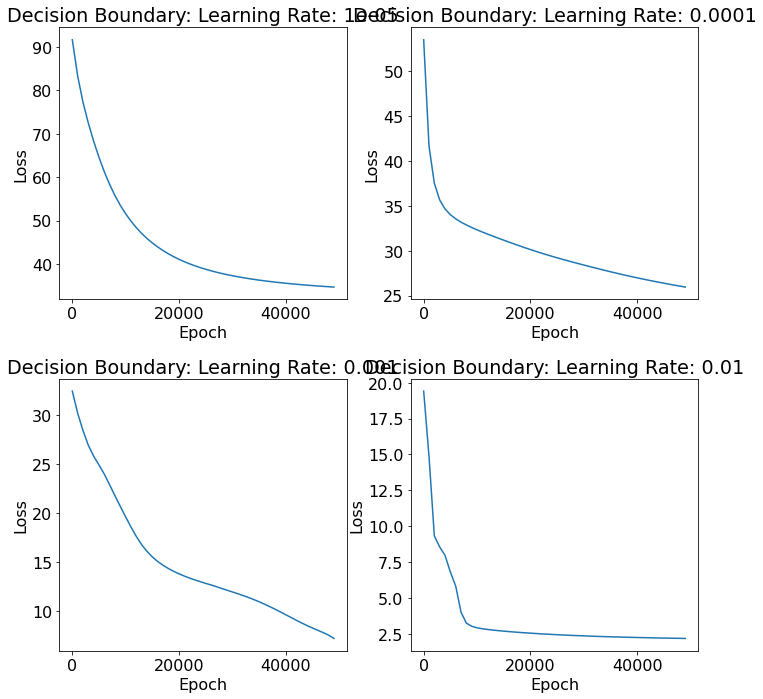

In [33]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 2
L2_norm = 0.001 
epoch = 50000


Learning_rate_list = [1e-5, 1e-4, 1e-3, 1e-2]
for i, LR in enumerate(Learning_rate_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Learning Rate: {LR}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=LR, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    print(f"Learning NN: Learning Rate {LR} ... done")
    y_test_pred = model.predict(X_test)
    print(f"Test Accuraty: {np.average(y_test==y_test_pred)}")
    
plt.gcf().set_size_inches(10, 10)
plt.tight_layout()
plt.show()

We can see that model small learning rate gives much smooth decrease in loss function. It is because the model trains much slowly! It updates each gradients in much smaller units. As a result, it slowly climbs down the gradient. When bigger learning rate was used, error decreased much faseter. As a result, the model was able to fit into the data much faster. This is good when the learning rate is not too big. If the learning rate is too big, the model might not climb down the gradient, but swing back and forth. Therefore, finding a good learning rate is critical in training models.

### 6. Analysis

Models with various numer of nodes were made and trained above. From the result, we can see that more nodes in the layers make more complex decision boundaries. This means that the number of nodes are related to the complexity of the model. This is because more nodes can make more features inside the model. As a result, the model was able to find more features to consider, and make a more complex decision boundary. However, this is not always great. Complex models lead to overfitting problems. Same problem can happen in Neural Networks too. Therefore, we need to find suitable number of nodes to use in hidden layers.

When sprial shape of training set was used in this model, the model was able to make a good decision boundary for the training sample. Although the training data was not linear, the model was able to make spiral decision boundaries. It is because of the 'non-linear' layers inside the model. Sigmoid Layer and Tanh layer are 'non-linear' layers than make non-linear decision boundaries. By using these layers, neural network can be trained to non-linear training samples too.

---